# Balance the Search

In this notebook, we will explore how different values of the `hnsw_ef` parameter affect the accuracy and speed of query execution in Qdrant vector search.


## Theory

When a query is performed, the HNSW algorithm starts searching from an entry point in the graph and explores neighboring nodes to find the closest vectors to the query vector. You can read more on the inner workings of HNSW in the Faiss book chapter at Pinecone. The `hnsw_ef` parameter determines how many nodes the algorithm keeps in its priority queue (the list of candidates) during this search process. In the context of HNSW, this parameter is often referred to as `ef` and stands for "exploration factor". A larger candidate list allows to consider a broader set of potential nearest neighbors.


## Objectives

In this notebook, we will run the approximate search on a test dataset with the following values of `hnsw_ef`:

```python
hnsw_ef_values = [10, 20, 50, 100, 200]
```

We will calculate the k-NN (exact) search results and use them as the ground truths to calculate the precision for each `hnsw_ef` value.


In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Import functions from the qdrant_evaluation package
from qdrant_evaluation import (
    get_client,
    load_test_dataset,
    evaluate_hnsw_ef,
    results_to_dataframe
)


In [9]:
# Define constants
QDRANT_HOST = "localhost"
QDRANT_PORT = 6333
COLLECTION_NAME = 'arxiv_papers'
k = 10
hnsw_ef_values = [10, 20, 50, 100, 200]


In [10]:
# Initialize Qdrant client
client = get_client(host=QDRANT_HOST, port=QDRANT_PORT)

# Load test dataset
test_dataset = load_test_dataset("/Users/danielwirth/PycharmProjects/Qdrant Further Steps/docs/01_evaluate_precision/queries_embeddings.json")
print(f"Loaded {len(test_dataset)} embeddings from test dataset")


Loaded 100 embeddings from test dataset


In [13]:
# Evaluate HNSW ef parameter
print("Evaluating HNSW ef parameter...")
results = evaluate_hnsw_ef(client, COLLECTION_NAME, test_dataset, hnsw_ef_values)

# Convert results to DataFrame
df = results_to_dataframe(results)
print("\nHNSW ef parameter evaluation results:")
# print(df)

# Display the results in a styled table format
styled_df = df.style.format({
    'avg_precision': '{:.4f}',
    'avg_query_time_ms': '{:.2f}'
})
display(styled_df)


Evaluating HNSW ef parameter...

HNSW ef parameter evaluation results:


,hnsw_ef,avg_precision,avg_query_time_ms
0,10,0.8200,3.06
1,20,0.8320,4.80
2,50,0.8330,4.15
3,100,0.8340,5.82
4,200,0.8340,6.20


## Visualization

We can visualize the results to better understand the relationship between `hnsw_ef`, precision, and query time.


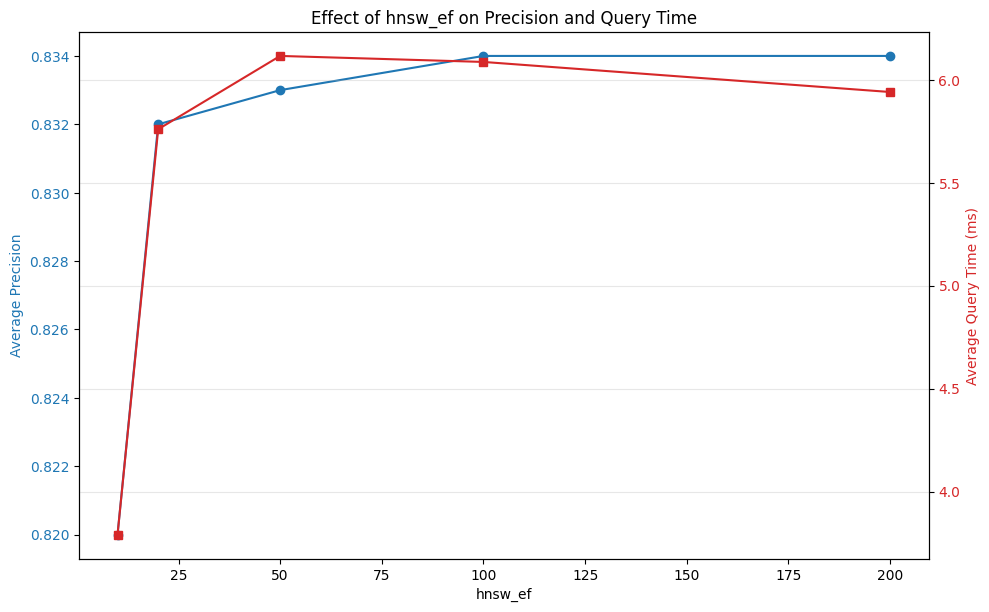

In [12]:
# Visualization function
def visualize_results(df):
    """
    Visualize the relationship between hnsw_ef, precision, and query time.

    Args:
        df (pd.DataFrame): DataFrame containing the results
    """
    hnsw_ef_values = df['hnsw_ef'].tolist()
    precisions = df['avg_precision'].tolist()
    query_times = df['avg_query_time_ms'].tolist()

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('hnsw_ef')
    ax1.set_ylabel('Average Precision', color=color)
    ax1.plot(hnsw_ef_values, precisions, color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Average Query Time (ms)', color=color)
    ax2.plot(hnsw_ef_values, query_times, color=color, marker='s')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Effect of hnsw_ef on Precision and Query Time')
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize the results
visualize_results(df)


## Conclusion

Based on the results, we can observe the following:

1. The average query time increases with the increase of `hnsw_ef`
2. Precision rises with the increase of `hnsw_ef`

This demonstrates the trade-off between search accuracy and performance in vector search systems. By adjusting the `hnsw_ef` parameter, we can balance between getting more accurate results and maintaining acceptable query performance.